In [1]:
import pandas as pd

df = pd.read_csv('/content/blogs.csv')


In [2]:
print(df.head())
print(df.info())
print(df.describe())


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                    

In [4]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab') # This line was added to download the missing resource

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Data'] = df['Data'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Data'])
y = df['Labels']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [8]:
print(classification_report(y_test, y_pred))


                          precision    recall  f1-score   support

             alt.atheism       0.53      0.94      0.68        18
           comp.graphics       0.71      0.83      0.77        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.79      0.76      0.78        25
   comp.sys.mac.hardware       0.86      0.86      0.86        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.83      0.56      0.67        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.71      0.94      0.81        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.86      0.95      0.90        19
         sci.electronics       0.67      0.75      0.71        16
                 sci.med       0.88      0.88      0.88        17
         

In [9]:
from textblob import TextBlob


In [10]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['Sentiment'] = df['Data'].apply(get_sentiment)


In [11]:
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)
print(sentiment_distribution)


Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   36.0      0.0      64.0
comp.graphics                 28.0      0.0      72.0
comp.os.ms-windows.misc       23.0      0.0      77.0
comp.sys.ibm.pc.hardware      18.0      0.0      82.0
comp.sys.mac.hardware         26.0      0.0      74.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                  20.0      0.0      80.0
rec.autos                     24.0      0.0      76.0
rec.motorcycles               29.0      0.0      71.0
rec.sport.baseball            38.0      0.0      62.0
rec.sport.hockey              44.0      0.0      56.0
sci.crypt                     23.0      0.0      77.0
sci.electronics               24.0      0.0      76.0
sci.med                       34.0      0.0      66.0
sci.space                     29.0      0.0      71.0
soc.religion.christian        25.0      0.0      75.0
talk.politics.guns          

In [12]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")


Accuracy: 0.8075
Precision: 0.8326691647812972
Recall: 0.8075
F1-Score: 0.7991740766856441


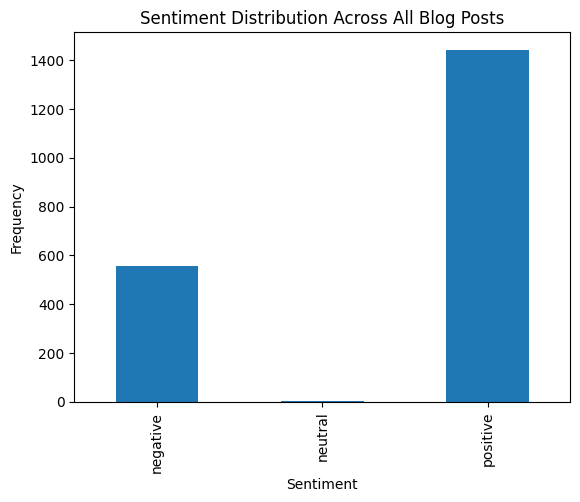

In [14]:
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module with the alias 'plt'

df.groupby('Sentiment').size().plot(kind='bar')
plt.title('Sentiment Distribution Across All Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()